#Stary light env

In [1]:
#All dependancies  
# Need to have All files in the same folder
#Need to check if the driver is install in local machine/PC 
#https://andor.oxinst.com/downloads/view/andor-driver-pack-2.104.30065.0-(ccd,iccd-emccd)
#MS260 control the spectrograph
#AndorCCD control the CCD and data aquistion
from MS260 import MS260
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#wrapper library to control the andor ccd
from AndorCCD import AndorCCD
from AndorErrorCodes import AndorErrorCodes
import time
#controlling themonchromater
from time import sleep
import sys
import csv

In [ ]:
#connect to the spectrograph (mapped to com3)
spectr = MS260('COM3')
#goto grating 3
spectr.command('GRAT 3')
#goto a center wavelength of 530nm
spectr.command('gowave 530')
#define wanted ccd temperature
desiredTemp = -20
#number of time one measurment need to be taken during  performing Aqcuisition
Average_index=10
Time=0.24
try:
       ccd
except NameError:
       ccd = AndorCCD('./Andor_420OE_CC_001/','Atmcd32d.dll')
#retrieve the detectorsize (stored in ccd.pixelX and ccd.pixelY)
ccd.getDetectorSize()
#turn on the cooler of the ccd and wait untill the temperature is reached
ccd.coolerOn(desiredTemp)

In [ ]:

# RUN this peace of code if SerialException: could not open port 'COM3': PermissionError appreare or restart the karnal of python env
#del spectr 


Loading the integeartion time of signal which obtained in CSV before 

In [ ]:

laser=[] #2d matrix
spectr.command('shutter o')
ccd.performAqcuisition(Time,Average_index)
while(ccd.readyForNextAqc == False):
            time.sleep(1)
data = ccd.data
laser.append(data)
np.savetxt("laser_632.8_2.csv",laser, delimiter = ",")



In [ ]:

with open("laser_632.8_2.csv","r") as f:
    reader=csv.reader(f)
    data=list(reader)
laster_Value=np.array(data,dtype=float)


In [ ]:
print(np.max(laster_Value[0]))

31633.80078125


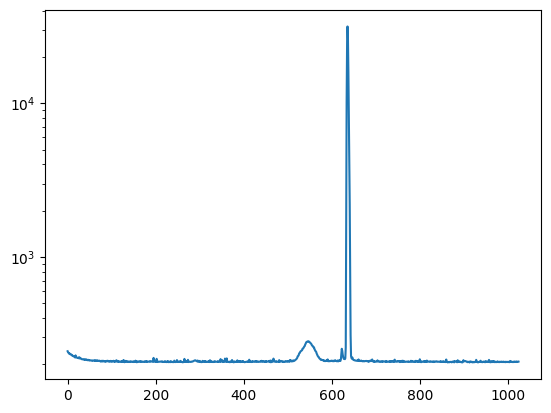

In [ ]:
plt.plot(laster_Value[0])
plt.yscale('log')

In [ ]:

laser_Dark=[] #2d matrix
spectr.command('shutter c')
ccd.performAqcuisition(Time,Average_index)
while(ccd.readyForNextAqc == False):
            time.sleep(1)
data = ccd.data
laser_Dark.append(data)
np.savetxt("laser_Dark_632.8_2.csv",laser_Dark, delimiter = ",")

In [ ]:

with open("laser_Dark_632.8_2.csv","r") as f:
    reader=csv.reader(f)
    data=list(reader)
Dark_VALU=np.array(data,dtype=float)


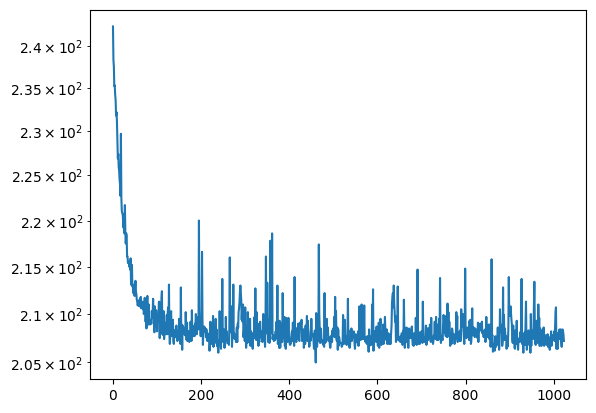

In [ ]:
plt.plot(Dark_VALU[0])
plt.yscale('log')

122.80420033633708


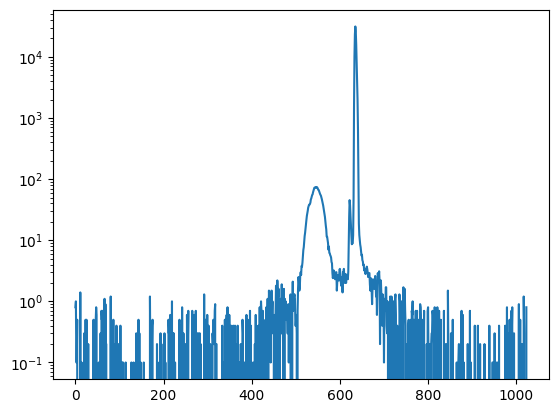

In [ ]:
plt.plot(laster_Value[0]-Dark_VALU[0])
rms = np.sqrt(np.mean(laster_Value[0]-Dark_VALU[0]))**2
print(rms)
laster_Value[0]-Dark_VALU[0]
plt.yscale('log')